In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from geotiff_processor import GeotiffProcessor

In [3]:
north_geotiff_index = pd.read_csv('daily_northern_geotiff_index.csv', index_col = 0)
north_geotiff_index.date = pd.to_datetime(north_geotiff_index.date, infer_datetime_format = True)

In [4]:
north_geotiff_index_conc = north_geotiff_index.loc[north_geotiff_index.image_type == 'concentration']
north_geotiff_index_ext = north_geotiff_index.loc[north_geotiff_index.image_type == 'extent']

In [5]:
north_geotiff_index_conc = north_geotiff_index_conc.set_index('date')
north_geotiff_index_ext = north_geotiff_index_ext.set_index('date')

In [6]:
north_geotiff_index_conc

,file_name,hemisphere,image_type
date,,,
1978-10-26,daily/geotiff/1978/N_19781026_concentration_v3...,north,concentration
1978-10-28,daily/geotiff/1978/N_19781028_concentration_v3...,north,concentration
1978-10-30,daily/geotiff/1978/N_19781030_concentration_v3...,north,concentration
1978-11-01,daily/geotiff/1978/N_19781101_concentration_v3...,north,concentration
1978-11-03,daily/geotiff/1978/N_19781103_concentration_v3...,north,concentration
...,...,...,...
2019-10-30,daily/geotiff/2019/N_20191030_concentration_v3...,north,concentration
2019-10-31,daily/geotiff/2019/N_20191031_concentration_v3...,north,concentration
2019-11-01,daily/geotiff/2019/N_20191101_concentration_v3...,north,concentration


In [7]:
north_conc_processor = GeotiffProcessor('raw_images/', north_geotiff_index_conc)
north_ext_processor = GeotiffProcessor('raw_images/', north_geotiff_index_ext)

In [8]:
oct281978_conc = north_conc_processor.load_by_date('1978-10-28')
oct281978_ext = north_ext_processor.load_by_date('1978-10-28')

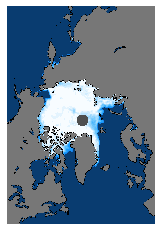

In [9]:
north_conc_processor.show_by_date('2000-10-27')

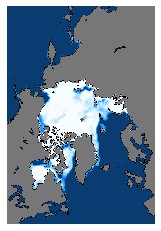

In [10]:
north_conc_processor.show_by_date('2018-06-01')

In [11]:
last_day_conc = north_conc_processor.load_by_date('2019-11-03')
last_day_ext = north_ext_processor.load_by_date('2019-11-03')

In [12]:
import pickle

In [13]:
with open('default_concentration_colormap.pkl', 'wb') as f:
    pickle.dump(last_day_conc.colormap(1), f)

with open('default_extent_colormap.pkl', 'wb') as f:
    pickle.dump(last_day_ext.colormap(1), f)

In [14]:
north_conc_processor.impute_missing_index_dates(set_this_index=False)

,file_name,hemisphere,image_type
1978-10-26,daily/geotiff/1978/N_19781026_concentration_v3...,north,concentration
1978-10-27,daily/geotiff/1978/N_19781028_concentration_v3...,north,concentration
1978-10-28,daily/geotiff/1978/N_19781028_concentration_v3...,north,concentration
1978-10-29,daily/geotiff/1978/N_19781030_concentration_v3...,north,concentration
1978-10-30,daily/geotiff/1978/N_19781030_concentration_v3...,north,concentration
...,...,...,...
2019-10-30,daily/geotiff/2019/N_20191030_concentration_v3...,north,concentration
2019-10-31,daily/geotiff/2019/N_20191031_concentration_v3...,north,concentration
2019-11-01,daily/geotiff/2019/N_20191101_concentration_v3...,north,concentration
2019-11-02,daily/geotiff/2019/N_20191102_concentration_v3...,north,concentration
